# Data Exploration for Sleep Dataset



Columns to drop:
- N/A

Features:
- Age - Numeric (discrete) - int
- Sex - Categorical (nominal) - object
- ChestPainType - Categorical (nominal) - object
- RestingBP - Numeric (discrete) - int
- Cholesterol - Numeric (discrete) - int
- FastingBS - Categorical (nominal) - given as int
    - 0 usually indicates normal fasting blood sugar (≤ 120 mg/dL).
    - 1 usually indicates elevated fasting blood sugar (> 120 mg/dL).
- RestingECG - Categorical (nominal) - object
- MaxHR - Numeric (discrete) - int
- ExerciseAngina - Categorical (nominal) - object
- Oldpeak - Numeric (continuous) - int
- ST_Slope - Categorical (nominal) - object

Targets
- HeartDisease - Numeric (discrete) - int


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import tree

from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

In [2]:
df_raw = pd.read_csv("heart.csv")
display(df_raw.head(10))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
df_heart = df_raw.copy()

df_heart.info() # examine the data types and look for missing values

print(df_heart.isna().sum())
print(f"Total missing: {df_heart.isna().sum().sum()}")
print(f"Shape before dropping missing values: {df_heart.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST

### COMMENTS:
- No missing values

In [4]:
df_heart.describe() # examine the summary statistics

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
# print the number of unique values for each column

for col in df_heart.columns:
    print(f"{col}: {df_heart[col].nunique()} unique values")

Age: 50 unique values
Sex: 2 unique values
ChestPainType: 4 unique values
RestingBP: 67 unique values
Cholesterol: 222 unique values
FastingBS: 2 unique values
RestingECG: 3 unique values
MaxHR: 119 unique values
ExerciseAngina: 2 unique values
Oldpeak: 53 unique values
ST_Slope: 3 unique values
HeartDisease: 2 unique values


In [6]:
# convert FastingBS to categorical (since it has only two values)
df_heart['FastingBS'] = df_heart['FastingBS'].astype('object')

Categorical Features:  ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


/tmp/ipykernel_112172/1840072202.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_heart, x=target_variables[0], ax=ax, palette='coolwarm')


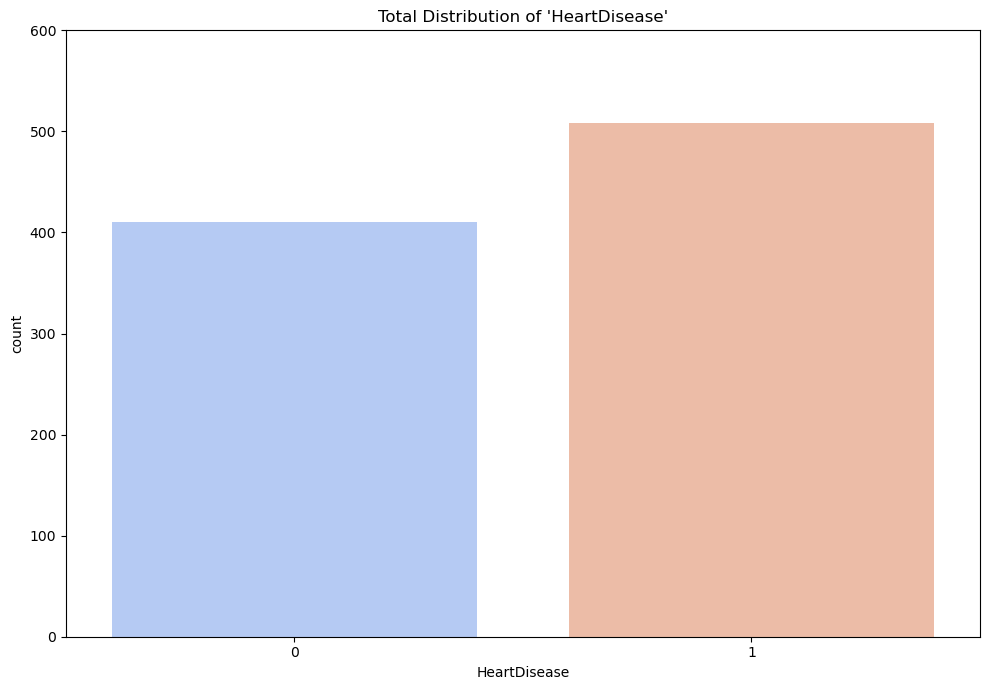

In [7]:
# select categorical features
categorical_features = df_heart.select_dtypes(include='object').columns.tolist() 
print("Categorical Features: ", categorical_features)

# target variable
target_variables = ['HeartDisease']

# overall distribution of the target variable (heart disease)
fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(data=df_heart, x=target_variables[0], ax=ax, palette='coolwarm')
ax.set_ylim(0, 600)
ax.set_title(f"Total Distribution of '{target_variables[0]}'")

plt.tight_layout()
plt.show()

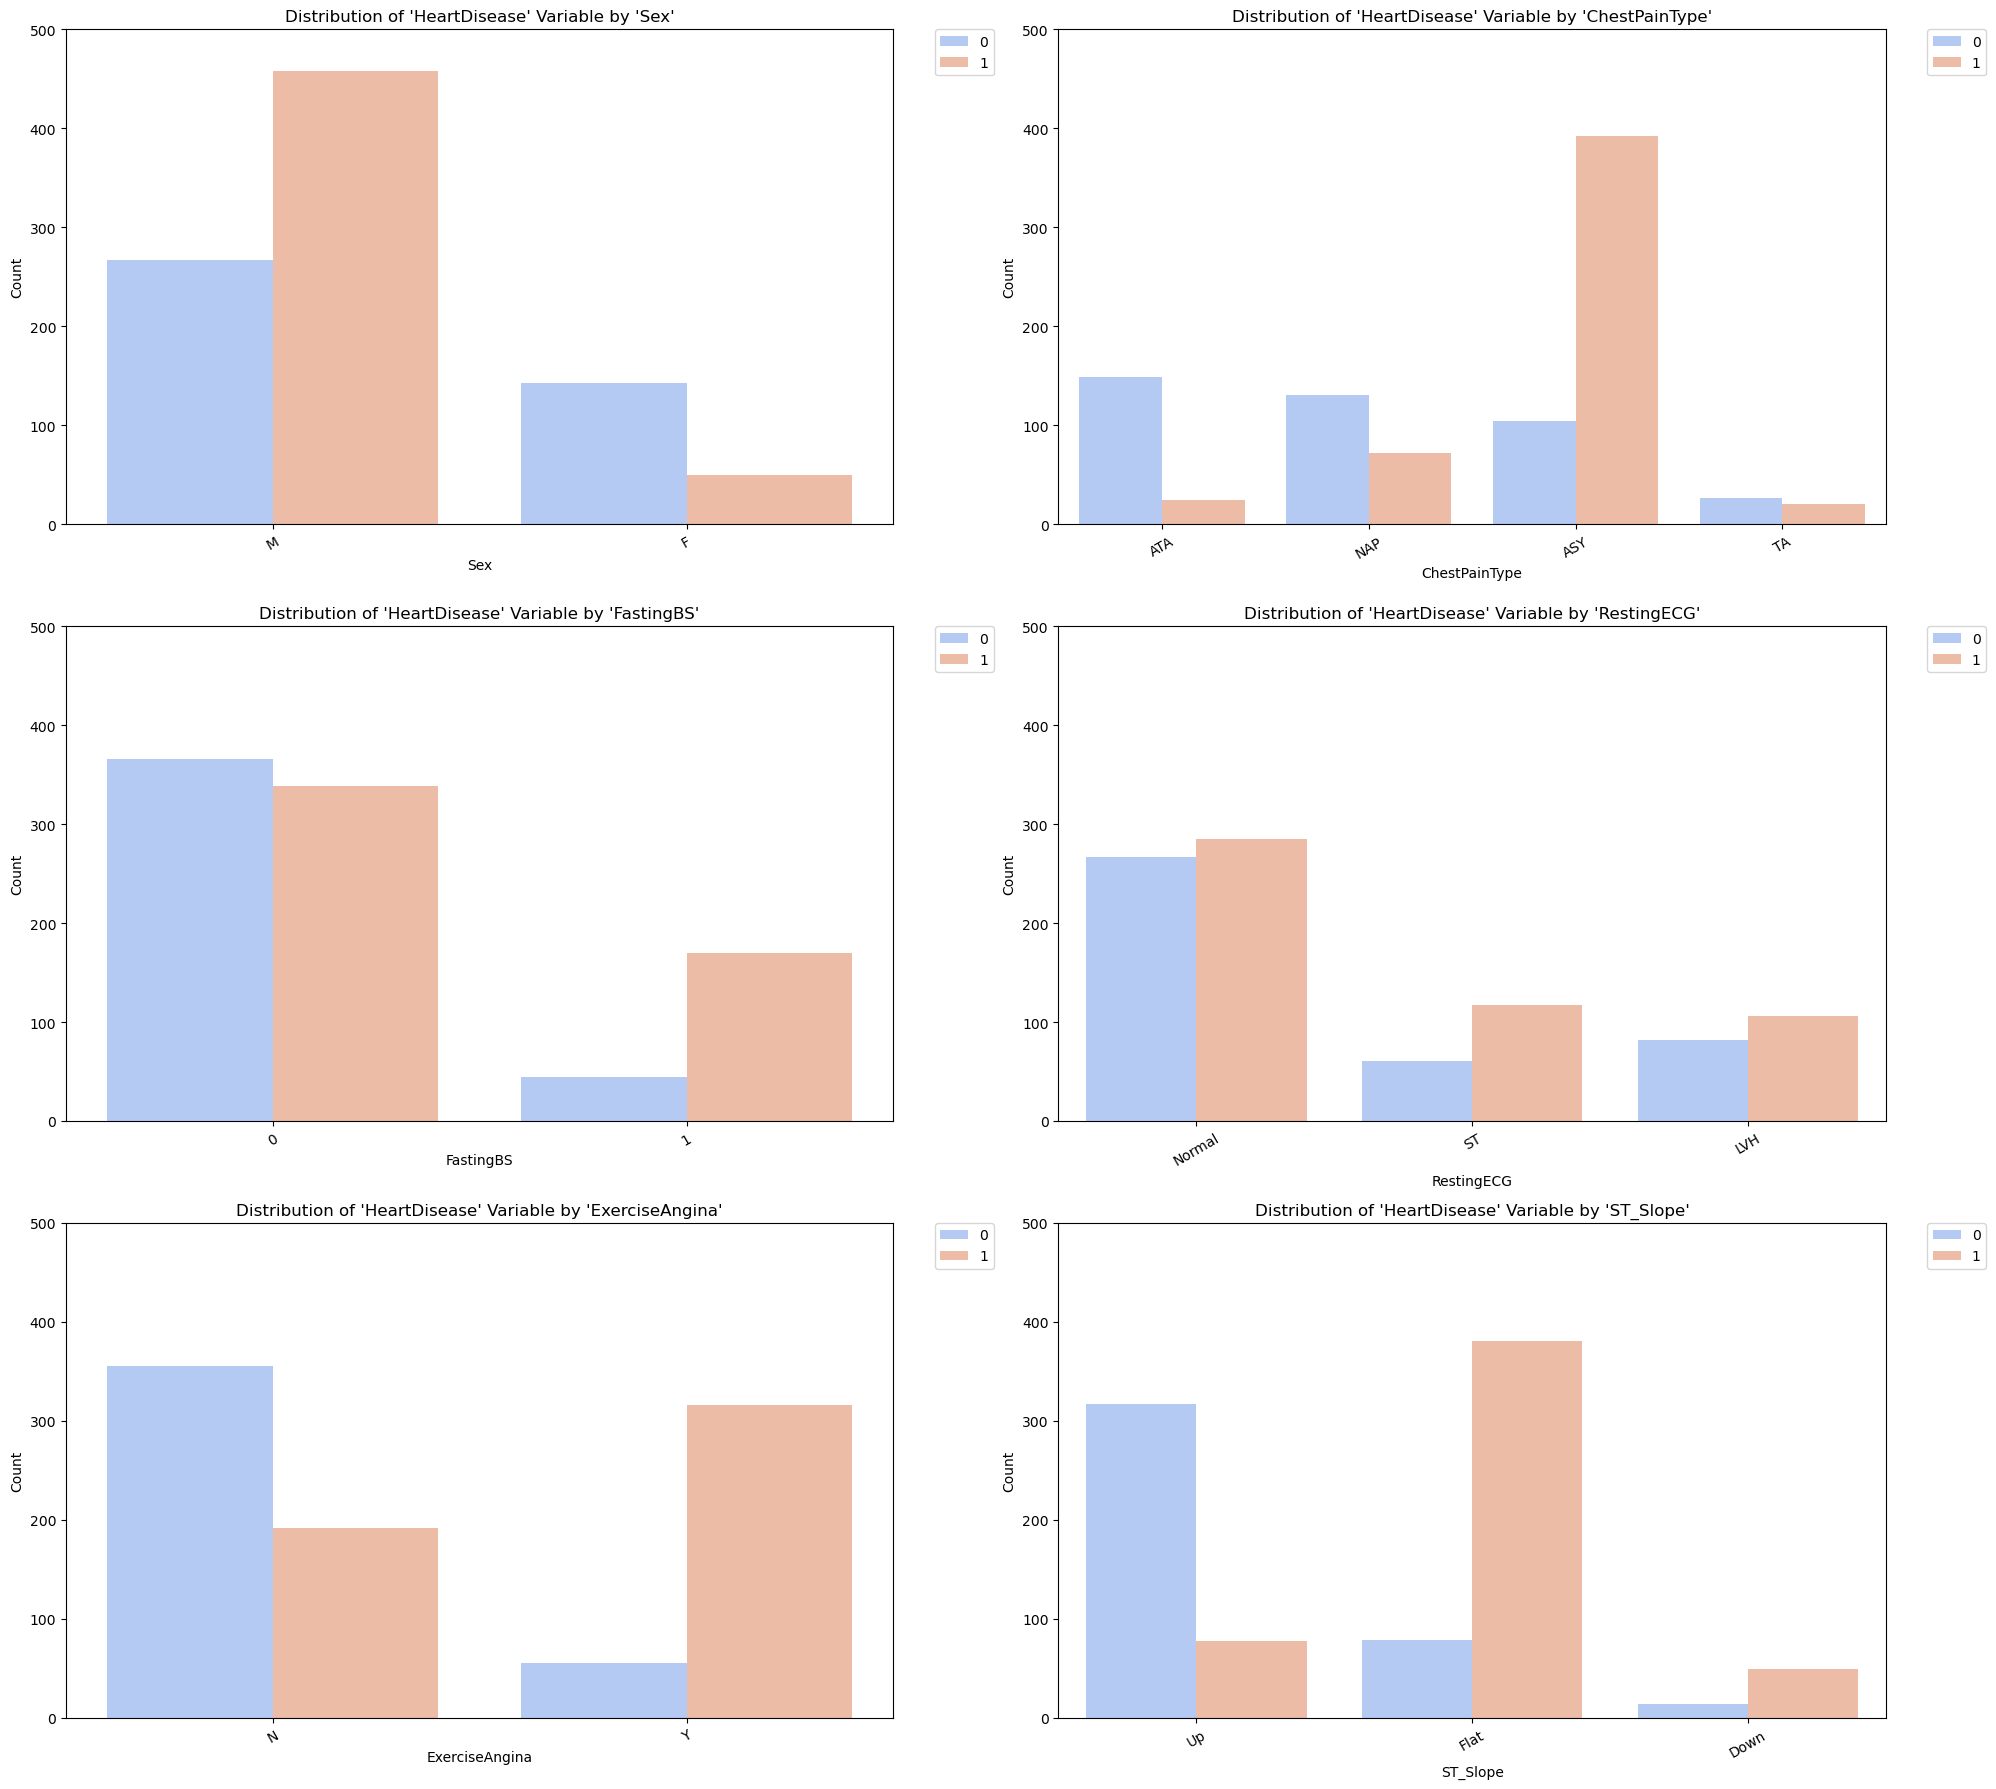

In [8]:
n_plots = len(categorical_features) * len(target_variables)
n_cols = 2
# dynamically determine number of rows needed
n_rows = (n_plots // n_cols) + (1 if n_plots % n_cols != 0 else 0) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*6))
axes = axes.flatten()

idx = 0
for target in target_variables:
    for feature in categorical_features:
        sns.countplot(
            data=df_heart, 
            x=feature, 
            hue=target,
            palette="coolwarm",
            ax=axes[idx]
        )
        axes[idx].set_title(f"Distribution of '{target}' Variable by '{feature}'")
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel("Count")
        axes[idx].set_ylim(0, 500)
        axes[idx].legend(
            loc='upper left',         
            bbox_to_anchor=(1.05, 1), # moves legend outside the axes
            borderaxespad=0.
        )   
        plt.setp(axes[idx].get_xticklabels(), rotation=30)
        idx += 1


plt.tight_layout()
plt.show()

### COMMENTS
- Males have a higher rate of heart disease compared to females.
- ChestPainType of 'ASY' appears associated with higher rate of heart disease.
- FastingBS of 1 appears associated with higher rate of heart disease.
- RestingECG of 'ST' appears associated with higher rate of heart disease.
- ExerciseAngina is associated with higher rate of heart disease.
- Flat ST_Slope is associated with higher rate of heart disease.

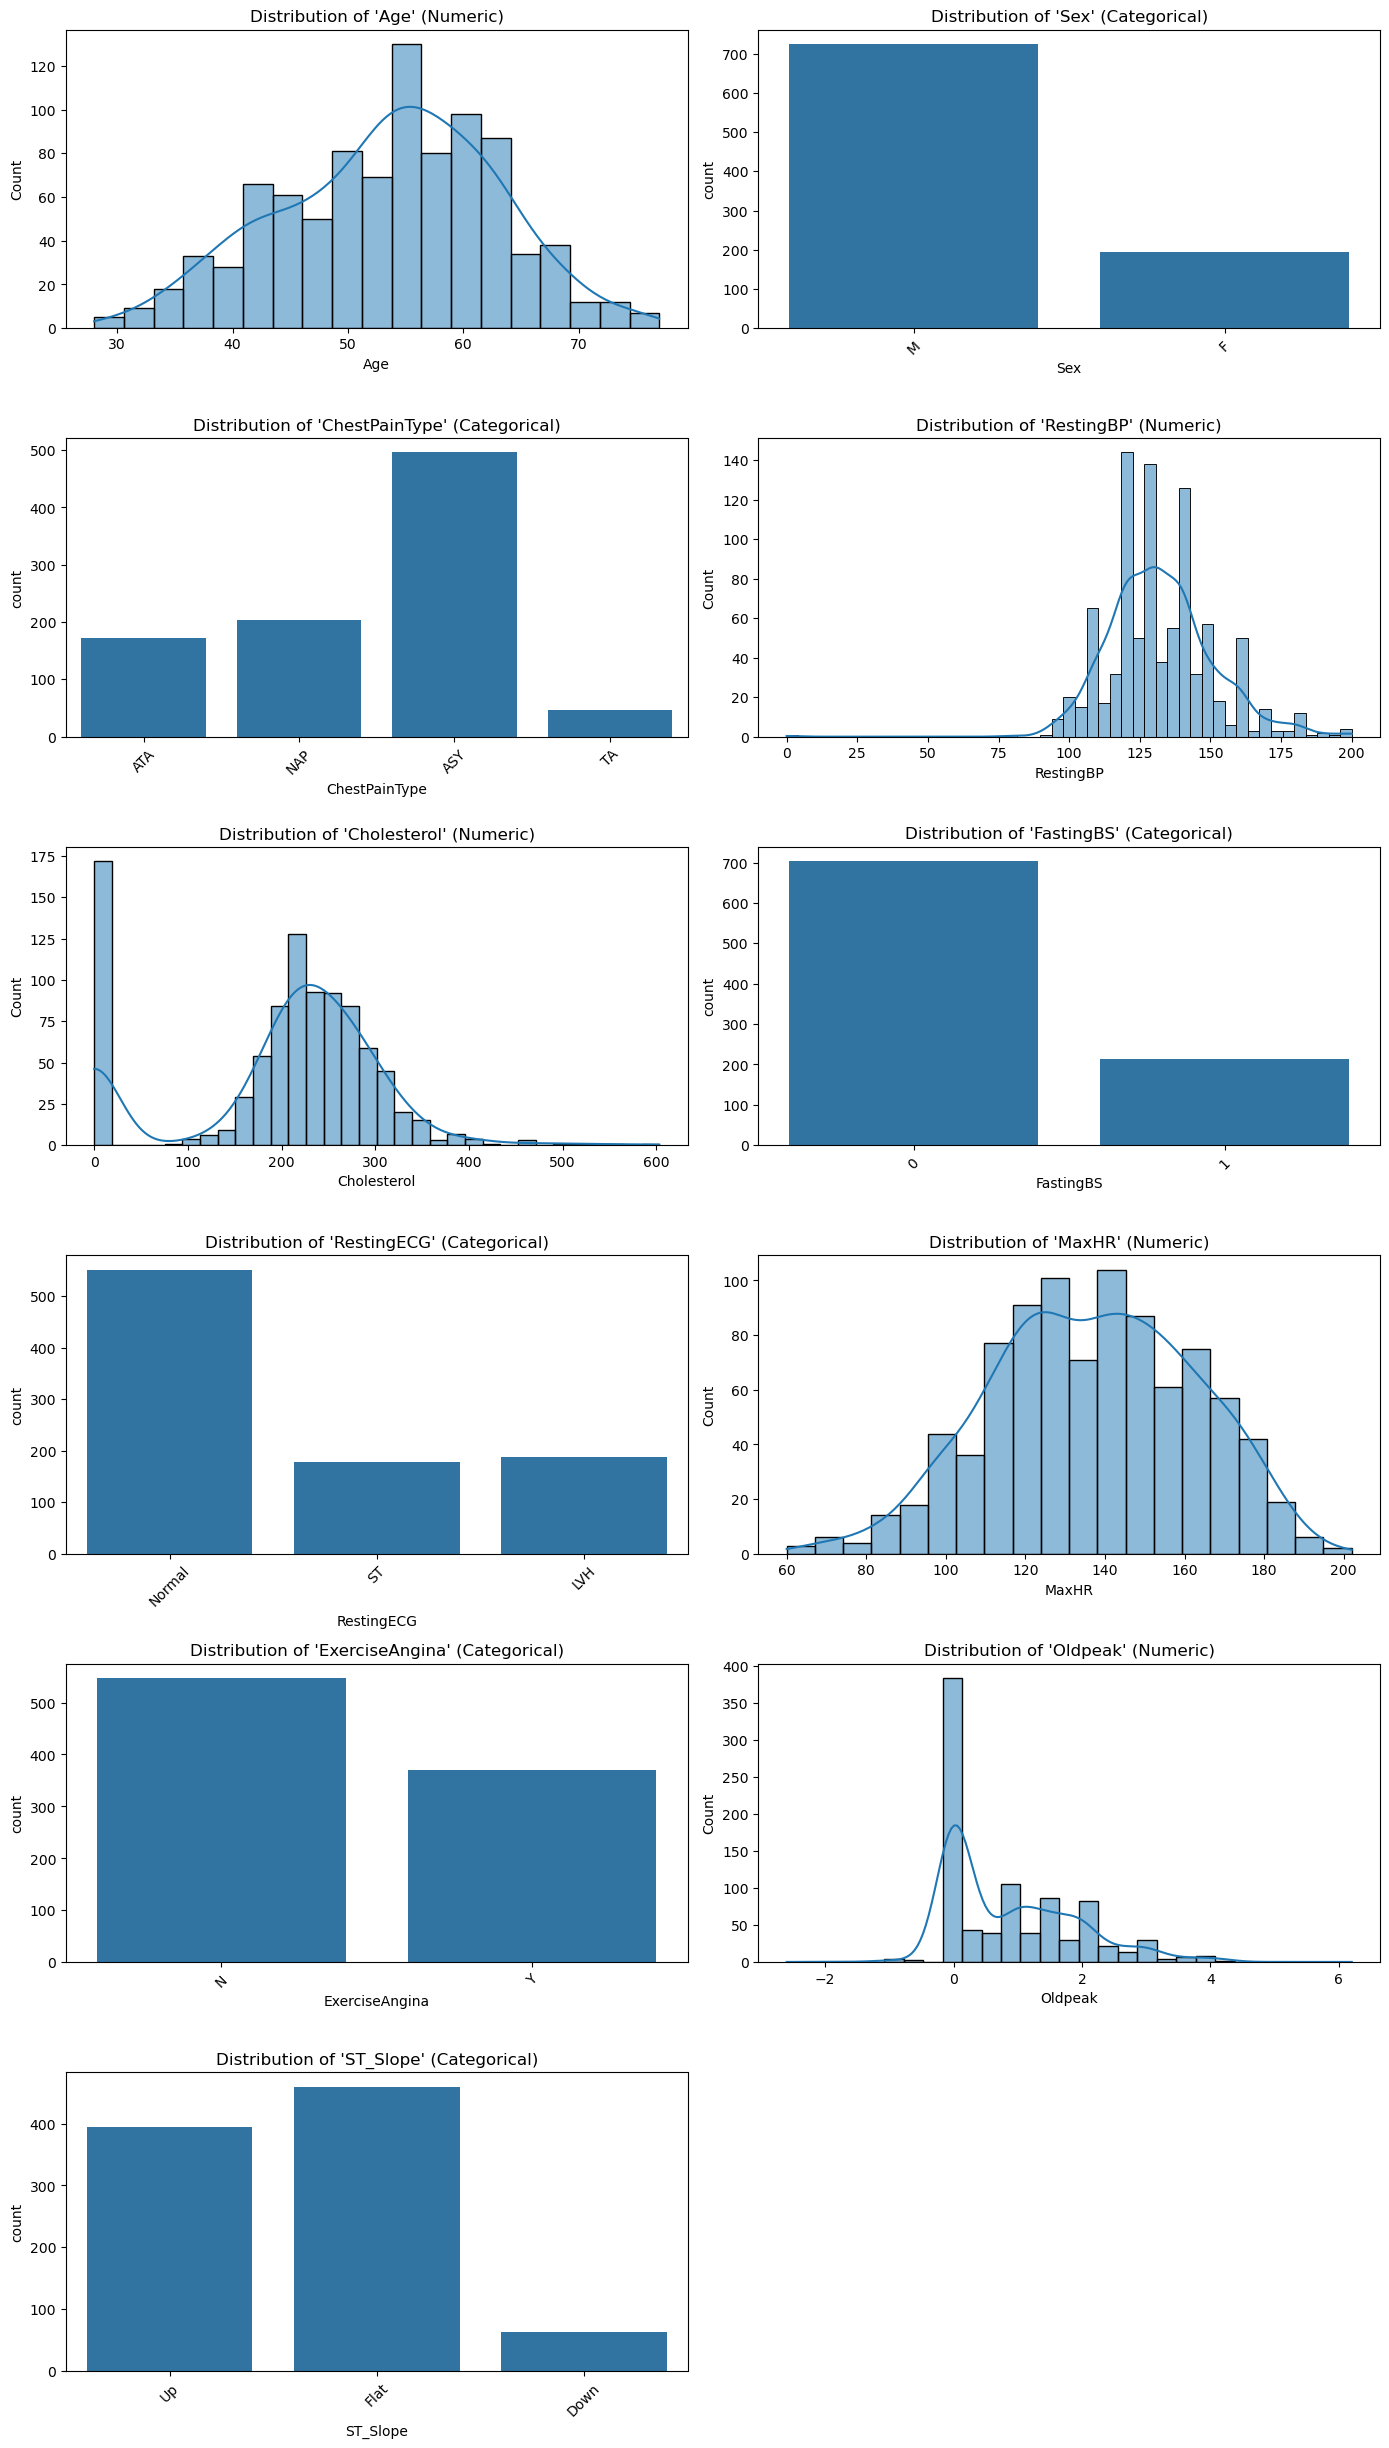

In [9]:
fig, axes = plt.subplots(7, 2, figsize=(14, 28))
axes = axes.flatten()

filtered_columns = [col for col in df_heart.columns if col not in target_variables]

for i, col in enumerate(filtered_columns):
    if df_heart[col].dtype == 'object':
        sns.countplot(data=df_heart, x=col, ax=axes[i]) # countplot if categorical
        axes[i].set_title(f"Distribution of '{col}' (Categorical)") 
        plt.setp(axes[i].get_xticklabels(), rotation=45)
    else:
        sns.histplot(data=df_heart, x=col, kde=True, ax=axes[i]) # histogram if numerical
        axes[i].set_title(f"Distribution of '{col}' (Numeric)")

# remove empty plots
for i in range(len(filtered_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

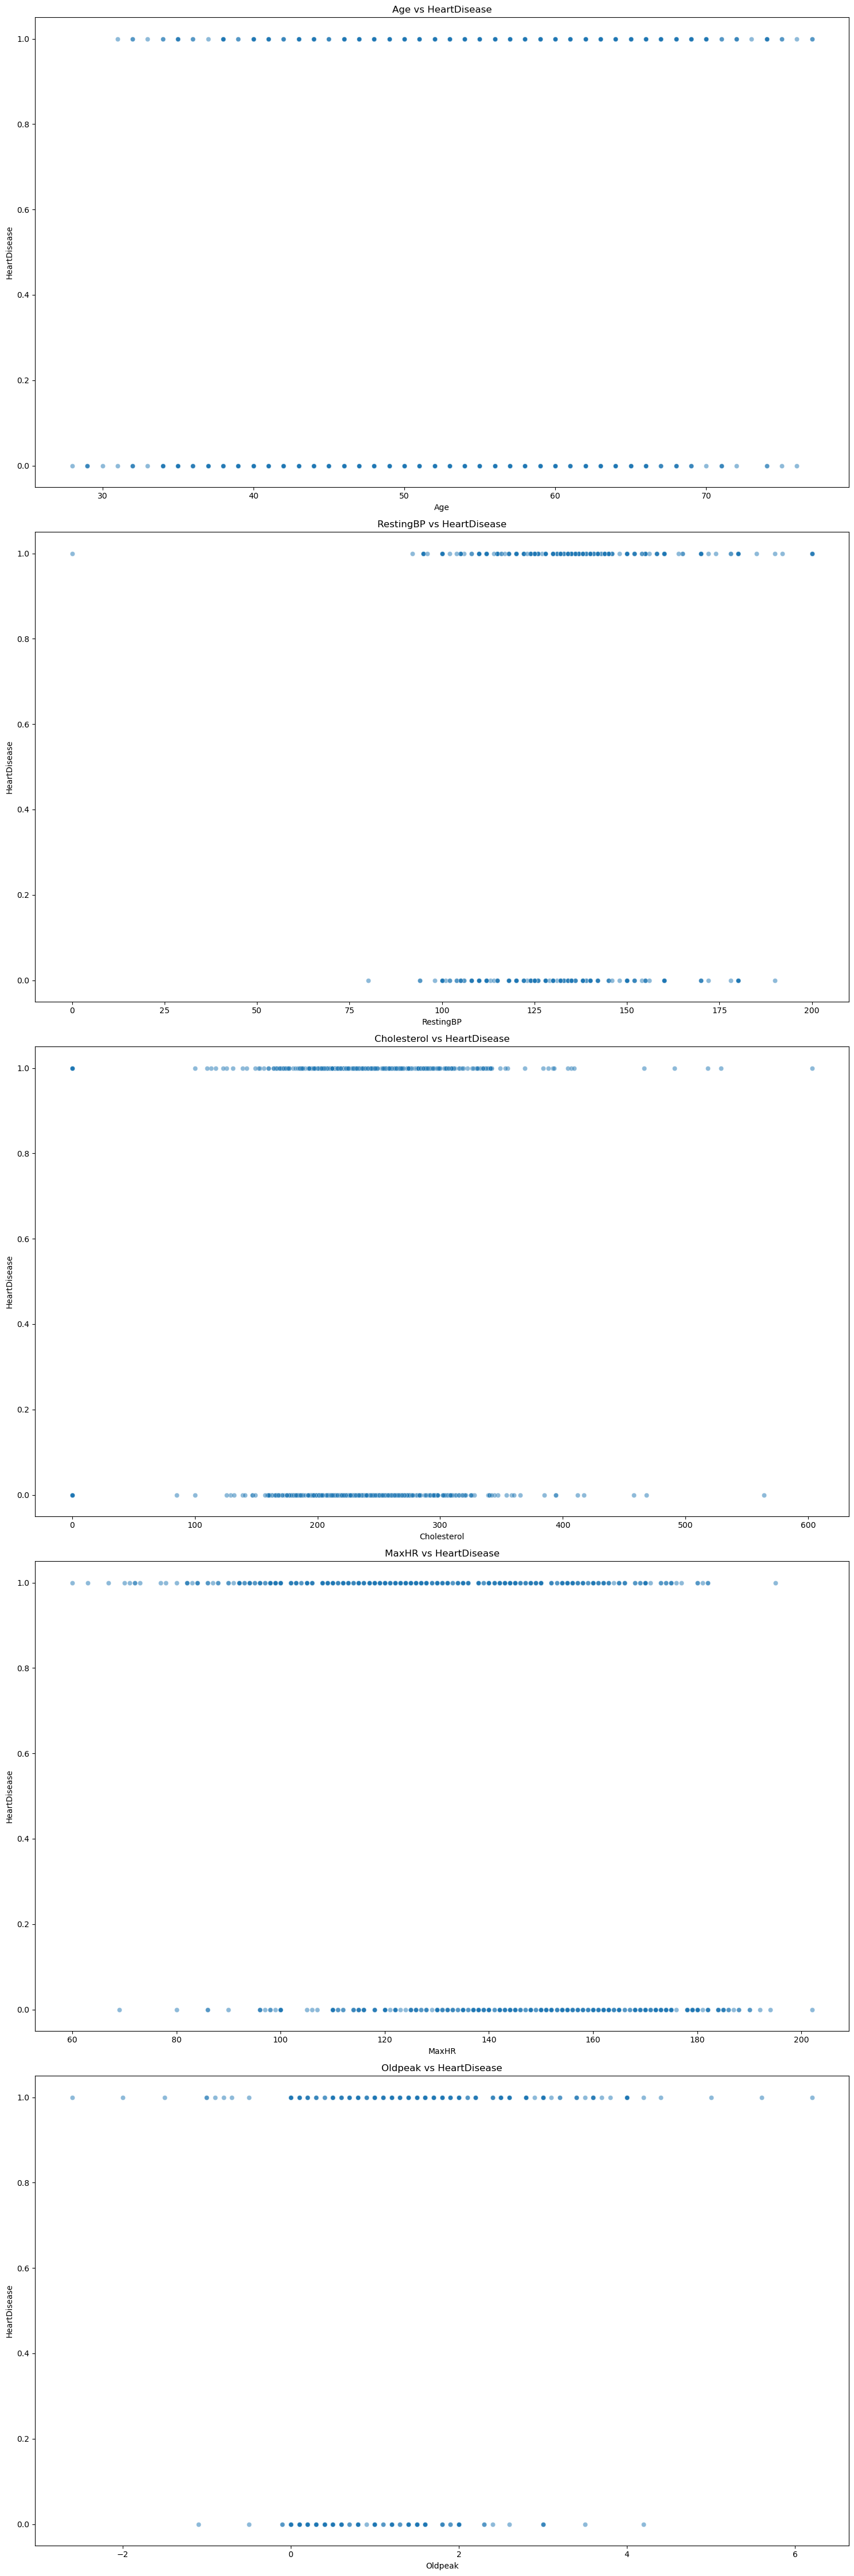

In [10]:
### CONTINUED

numeric_features = df_heart.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('HeartDisease')

fig, axes = plt.subplots(len(numeric_features), len(target_variables), figsize=(15, 45), squeeze=False)
for i, feature in enumerate(numeric_features):
    for j, target in enumerate(target_variables):
        sns.scatterplot(data=df_heart, x=feature, y=target, ax=axes[i, j], alpha=0.5)
        axes[i, j].set_title(f"{feature} vs {target}")
plt.tight_layout()
plt.show()

### COMMENTS
- Furthermore, scatterplots don't seem to be the most useful modality for visualizing this binary data. There does not appear to be any easily discernible pattern to the relationship betwen numeric features and the numeric target variables via scatterplot alone.

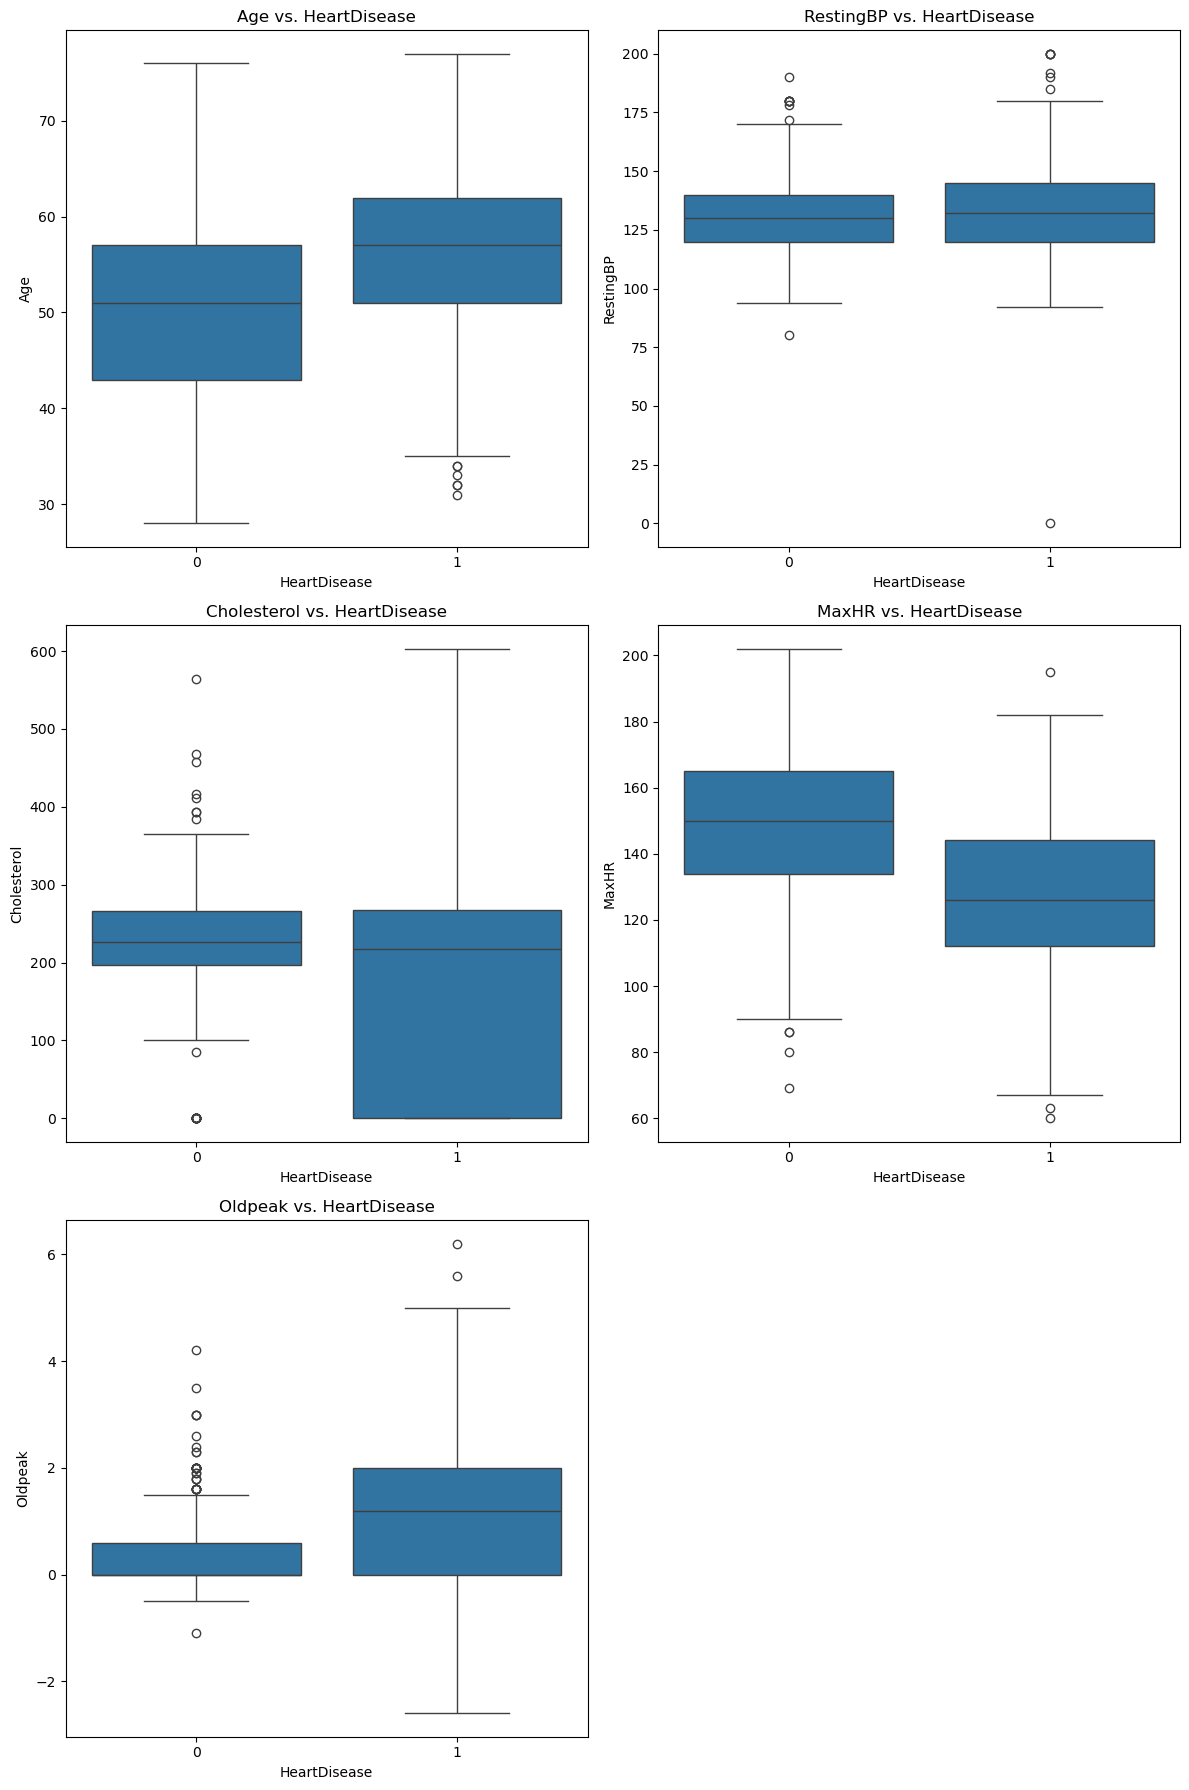

In [12]:
import math

n_features = len(numeric_features)
ncols = 2
nrows = math.ceil(n_features / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6 * nrows))

axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    sns.boxplot(
        data=df_heart, 
        x='HeartDisease', 
        y=feature, 
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} vs. HeartDisease")

#hide any leftover axes (in case n_features is odd)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### COMMENTS
- Greater values of Age and Oldpeak appear more correlated with Heart Disease.
- Lower values of MaxHR appear more correlated with Heart Disease.

In [13]:
# data splitting

X = df_heart.drop(columns=["HeartDisease"]) # drop target variables
y = df_heart[["HeartDisease"]] # df with target variables

# use single split for X and y
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# ohe encoding for categorical features
X_dev_ohe = pd.get_dummies(X_dev, dummy_na=False, dtype=int, drop_first=True) 
X_test_ohe = pd.get_dummies(X_test, dummy_na=False, dtype=int, drop_first=True) 

display(X_dev_ohe.head(10))

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
795,42,120,240,194,0.8,1,0,1,0,1,1,0,0,0,0
25,36,130,209,178,0.0,1,0,1,0,0,1,0,0,0,1
84,56,150,213,125,1.0,1,0,0,0,1,1,0,1,1,0
10,37,130,211,142,0.0,0,0,1,0,0,1,0,0,0,1
344,51,120,0,104,0.0,1,0,0,0,1,1,0,0,1,0
254,55,145,248,96,2.0,1,0,0,0,0,1,0,1,1,0
398,52,165,0,122,1.0,1,0,0,0,1,1,0,1,0,1
244,48,160,268,103,1.0,1,0,0,0,0,1,0,1,1,0
621,56,130,256,142,0.6,1,0,1,0,1,0,0,1,1,0
118,35,120,160,185,0.0,0,0,0,1,0,0,1,0,0,1


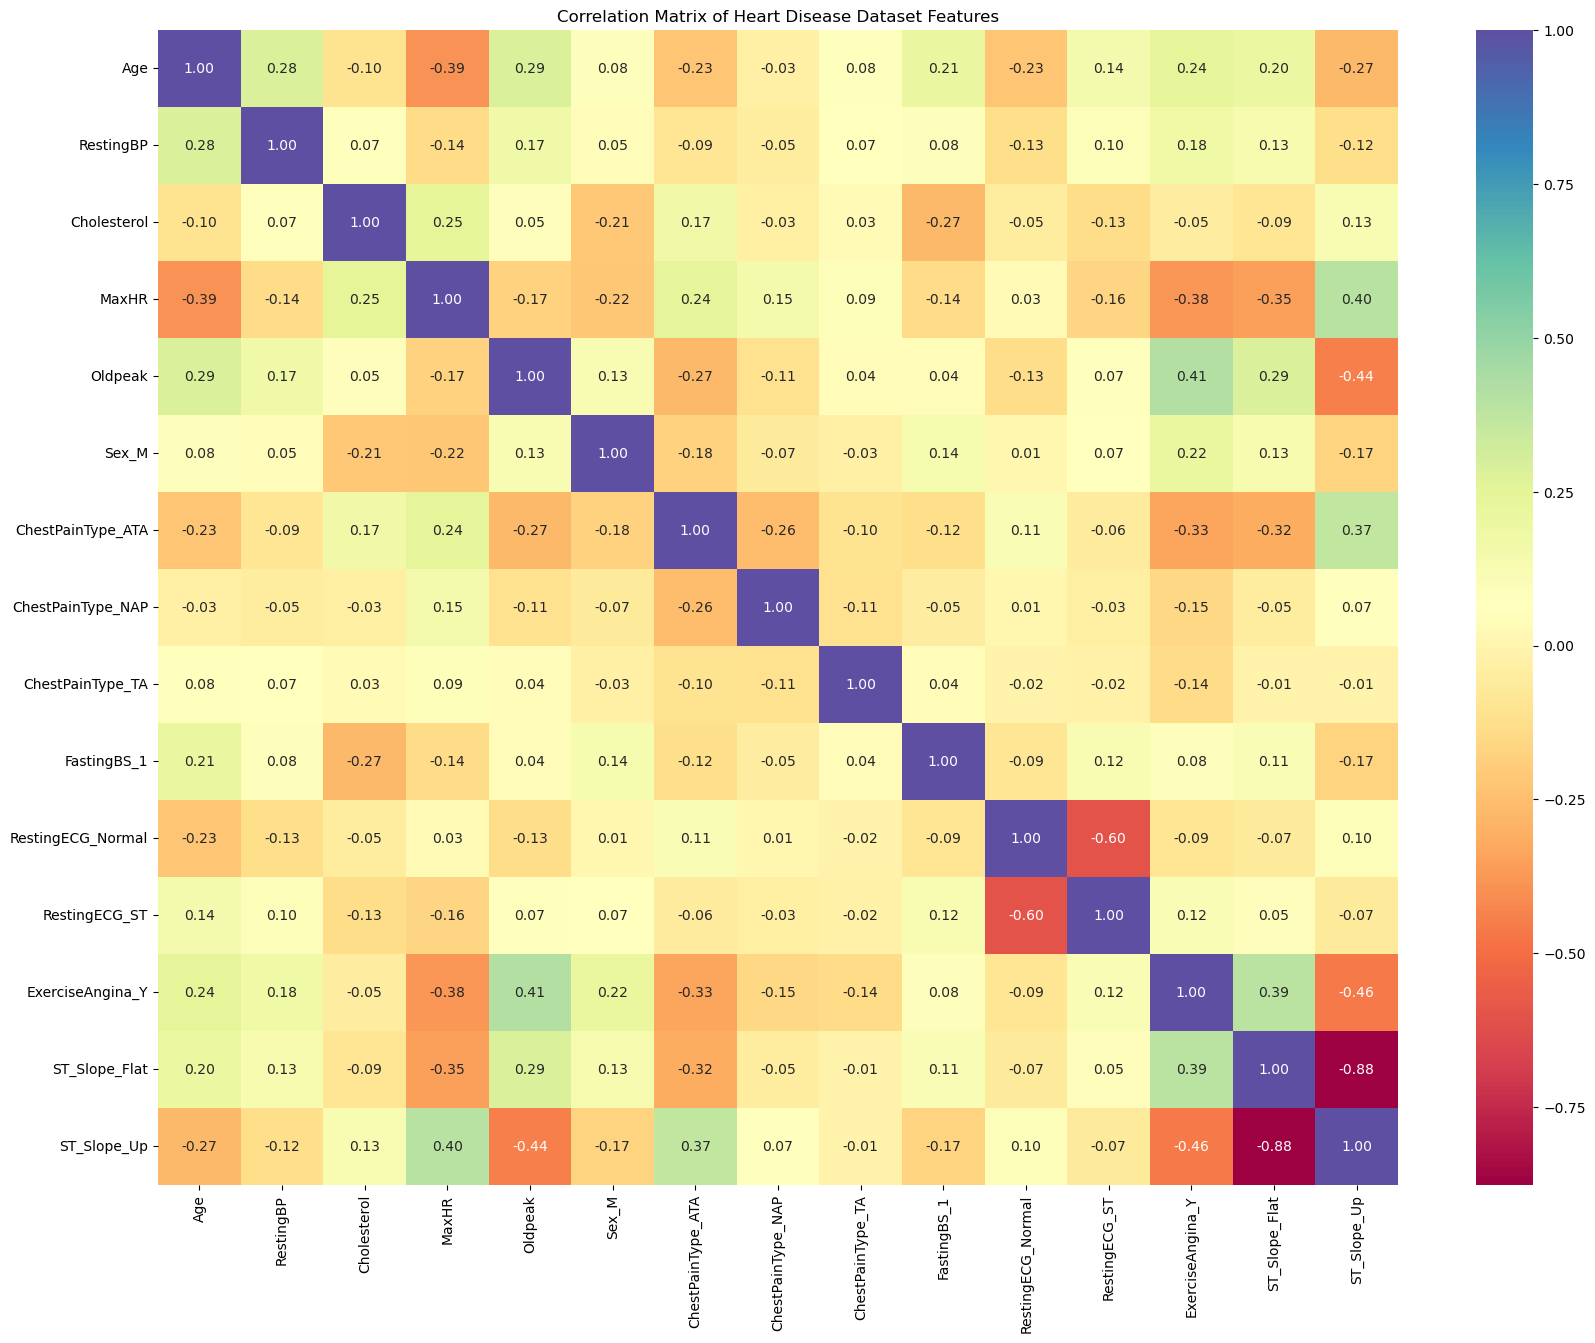

In [16]:
# Correlation matrix

corr = X_dev_ohe.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='Spectral', fmt='.2f') 
plt.title('Correlation Matrix of Heart Disease Dataset Features')
plt.show()

### COMMENTS
A few noteworthy correlation pairs include:
- Negative correlation between ST_Slope_Up and ST_Slope_Flat (-0.88) that is borderline extreme in magnitude. It is recommended to drop one of these columns for our regression models, due to potential impact of multicollinearity.
- Negative correlation between RestingECG_ST and RestingECG_Normal (-0.60)
- Negative correlation between MaxHR and Age (-0.39). This corresponds with known information about how peak heart rates decrease with age.
- Negative correlation between ST_Slope_Up and ExerciseAngina_Y. This corresponds with known information about how up-sloping ST segment during exertion usually reflects adequate myocardial perfusion (i.e. no exercise angina).